## Homework 3: Qualifying Red Wine

Cassia Cai 
fmc2855@uw.edu

#### Goal: develop an algorithm that predicts the quality of wine from a series of chemical measurements
You have been hired as a data scientist by a winery in Portugal. Your task is to develop an algorithm that predicts the quality of wine from a series of chemical measurements. Your algorithm will be used by the marketing team to price a new batch of products.

You have access to a training data set wine_training.csv consisting of 1115 instances (different types of wine that were measured in the lab) and a test data set wine_test.csv with 479 instances. Each instance of the data has 11 attributes (features) that are outlined in the description file wine_description.txt. The corresponding output to each set of features is the quality of the wine on a scale of 0 to 10 provided by experts. Finally, you are given the lab measurements for a batch of five new wines in wine_new_batch.csv for which you are required to predict the qualities.

####  Description
This dataset is a subset of data set of [Cortez et al., 2009]: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.  Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

This description has been modified slightly from the original to tailor the data set to a homework assignment for AMATH 482/582 course at University of Washington. The datasets is related to variants of the Portuguese "Vinho Verde" red wine. For details, consult: http://www.vinhoverde.pt/en/.
   
Number of Instances: 1115 (training) and 479 (test) 
Number of input features: 11 (numeric)
Number of outputs: 1 (numeric)
  
Attributes information (input features/columns 1-11 in CSV files):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output (column 12 in CSV file): 
12. quality (score between 0 and 10)

In [1]:
#  ------------------ import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
#  ------------------ load data files
wine_training = np.loadtxt('wine_training.csv', delimiter=",", unpack=True) # training data
wine_test = np.loadtxt('wine_test.csv', delimiter=",", unpack=True) # test data

wine_new_batch = np.loadtxt('wine_new_batch.csv', delimiter=",", unpack=True) # new batch where we do not know labels

In [3]:
X_train = wine_training[0:11] # attributes are the first 11 columns
Y_train = wine_training[-1] # quality score is the last column

X_test = wine_test[0:11]
Y_test = wine_test[-1]

X_new = wine_new_batch[0:11]
Y_new = wine_new_batch[-1]

#### Normalize data

In [4]:
import numpy.matlib
# we normalize and center the training set

X_train_N = X_train.shape[1]

X_train_mean = np.mean(X_train, axis=1)
X_train_std = np.std(X_train, axis=1)

X_train_normal = (np.transpose(X_train) - np.matlib.repmat(X_train_mean, X_train_N, 1))/np.matlib.repmat(X_train_std, X_train_N, 1)

# -------------------------------

Y_train_N = Y_train.shape[0]

Y_train_mean = np.mean(Y_train, axis=0)
Y_train_std = np.std(Y_train, axis=0)

Y_train_normal = (Y_train - Y_train_mean)/Y_train_std

X_train_normal_transp = np.transpose(X_train_normal)
Y_train_normal_transp = np.transpose(Y_train_normal)

In [5]:
X_test_N = X_test.shape[1]

X_test_normal = (np.transpose(X_test) - np.matlib.repmat(X_train_mean, X_test_N, 1))/np.matlib.repmat(X_train_std, X_test_N, 1)
Y_test_normal = (Y_test - Y_train_mean)/Y_train_std

X_test_normal_transp = np.transpose(X_test_normal)
Y_test_normal_transp = np.transpose(Y_test_normal)

In [6]:
X_new_N = X_new.shape[1]

X_new_normal = (np.transpose(X_new) - np.matlib.repmat(X_train_mean, X_new_N, 1))/np.matlib.repmat(X_train_std, X_new_N, 1)
Y_new_normal = (Y_new - Y_train_mean)/Y_train_std

X_new_normal_transp = np.transpose(X_new_normal)
Y_new_normal_transp = np.transpose(Y_new_normal)

#### Calculate MSE

In [7]:
def calculate_MSE(predicted_array, actual_labels):
    ''' ----------------------------------------
    a function that calculates the mean squared error
    of the predicted labels and the actual labels
    -----------------------------------------'''
    MSE = (1/len(predicted_array))*np.linalg.norm(predicted_array - actual_labels)**2
    return MSE

#### Use linear regression

In [45]:
#  ------------------ Use linear regression (least squares) to fit a linear model to the training set.
from sklearn.linear_model import LinearRegression

X_train_normal_transp = np.transpose(X_train_normal)

linear_regressor = LinearRegression()  # create object for the class
reg = LinearRegression().fit(X_train_normal, Y_train_normal)

linear_regressor.fit(X_train_normal, Y_train_normal)  # perform linear regression
Y_pred_train = linear_regressor.predict(X_train_normal)  # make predictions
Y_pred_test = linear_regressor.predict(X_test_normal)  # make predictions
Y_pred_new = linear_regressor.predict(X_new_normal)  # make predictions

lin_reg_MSE_train = calculate_MSE(Y_pred_train, Y_train_normal)
lin_reg_MSE_test = calculate_MSE(Y_pred_test, Y_test_normal)

print(lin_reg_MSE_train)
print(lin_reg_MSE_test)

0.6278484956554883
0.7471696905187212


In [61]:
linear_regressor.coef_

array([-0.00334691, -0.30349697, -0.08864764,  0.0015453 , -0.14462044,
        0.0833643 , -0.19288915,  0.03046118, -0.08408778,  0.21289668,
        0.34923071])

In [76]:
model = linear_regressor

In [80]:
from sklearn.metrics import median_absolute_error

In [108]:
X_test_normal_transp[0,:].shape

(479,)

In [112]:
labels = ['fixed acidity','volatile acidity','citric acid','residual sugar',
         'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH',
         'sulphates','alcohol']

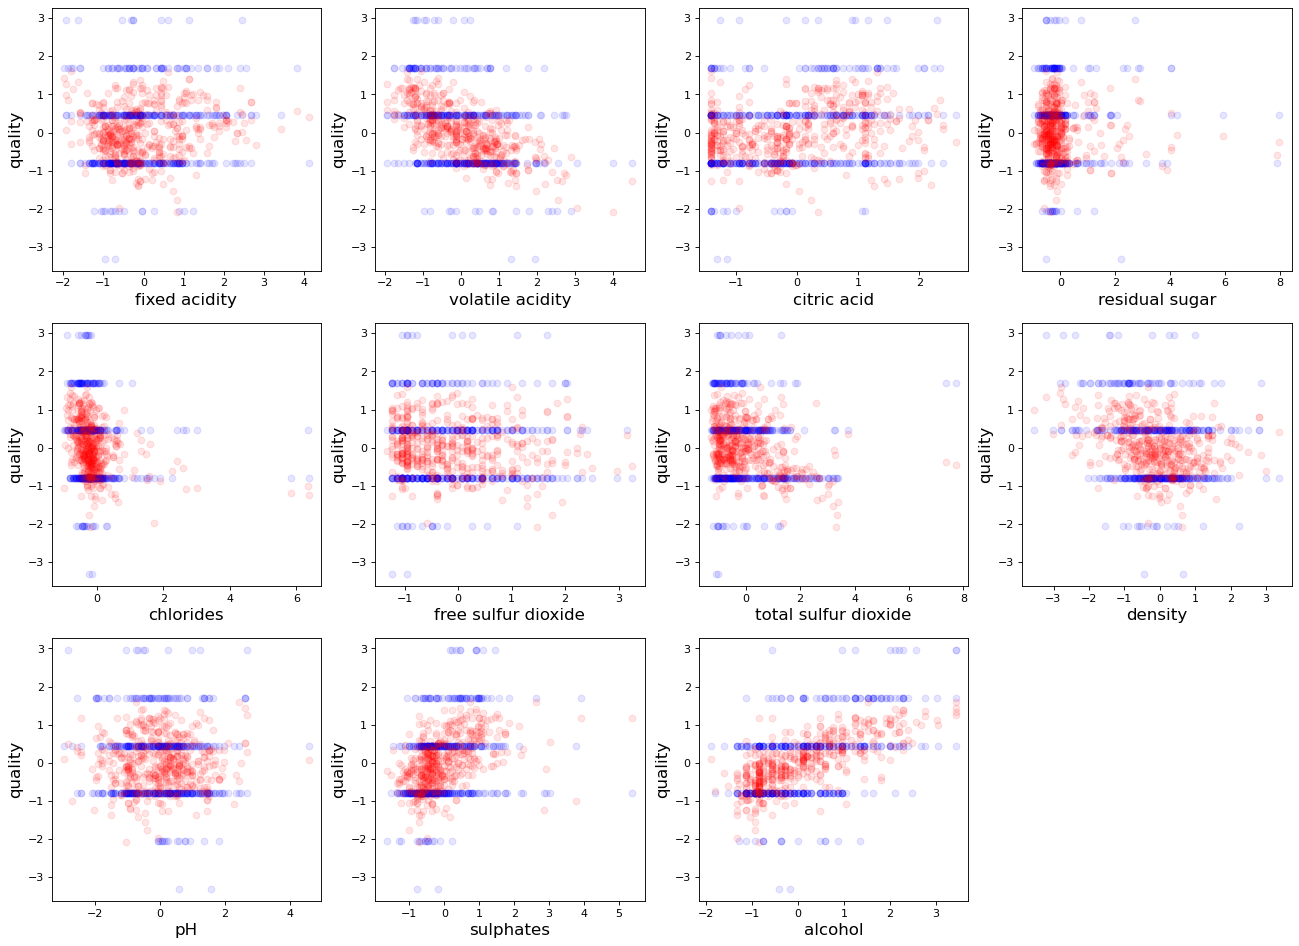

In [118]:
fig = plt.figure(figsize=(20, 20), dpi=80)
for i in range(1,12):
    xlabel = labels[i-1]
    plt.subplot(4, 4, i)
    plt.scatter(X_test_normal_transp[i-1,:], Y_test_normal,c='blue',alpha=0.1)
    plt.scatter(X_test_normal_transp[i-1,:], Y_pred_test,c='red',alpha=0.1)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
    plt.ylabel('quality', fontsize=15)
    plt.xlabel(str(xlabel), fontsize=15)
plt.show()

#### GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

#### Gaussian Kernel

In [49]:
cv = GridSearchCV(KernelRidge(kernel='rbf'), param_grid={'alpha':2**np.linspace(-4,4,20), "gamma": 1/(2*(2**np.linspace(-4,4,20))**2)},cv=10)
cv.fit(X_train_normal, Y_train_normal)
print(cv.best_params_)

{'alpha': 0.4820879989712475, 'gamma': 0.06482219027788706}


In [50]:
alpha_val = list(cv.best_params_.items())[0][1]
gamma_val = list(cv.best_params_.items())[1][1]

In [51]:
gaussian_krr = skl.kernel_ridge.KernelRidge(kernel='rbf', alpha = alpha_val, gamma=gamma_val) 

gaussian_krr.fit(X_train_normal, Y_train_normal)
RBF_Y_train_predict = gaussian_krr.predict(X_train_normal)
RBF_Y_test_predict = gaussian_krr.predict(X_test_normal)
RBF_Y_new_predict = gaussian_krr.predict(X_new_normal)

RBF_MSE_train = calculate_MSE(RBF_Y_train_predict, Y_train_normal)
RBF_MSE_test = calculate_MSE(RBF_Y_test_predict, Y_test_normal)

print(RBF_MSE_train)
print(RBF_MSE_test)

0.43804154613816276
0.6665889132279776


#### Laplacian Kernel

In [46]:
cv = GridSearchCV(KernelRidge(kernel='laplacian'), param_grid={'alpha':2**np.linspace(-4,4,20), "gamma": 1/((2**np.linspace(-4,4,20)))},cv=10)
cv.fit(X_train_normal, Y_train_normal)
print(cv.best_params_)

{'alpha': 0.2008528066417206, 'gamma': 0.26892264655504566}


In [47]:
alpha_val = list(cv.best_params_.items())[0][1]
gamma_val = list(cv.best_params_.items())[1][1]

In [48]:
laplacian_krr = skl.kernel_ridge.KernelRidge(kernel='laplacian', alpha = alpha_val, gamma=gamma_val)

laplacian_krr.fit(X_train_normal, Y_train_normal)
lap_Y_train_predict = laplacian_krr.predict(X_train_normal)
lap_Y_test_predict = laplacian_krr.predict(X_test_normal)
lap_Y_new_predict = laplacian_krr.predict(X_new_normal)

lap_MSE_train = calculate_MSE(lap_Y_train_predict, Y_train_normal)
lap_MSE_test = calculate_MSE(lap_Y_test_predict, Y_test_normal)

print(lap_MSE_train)
print(lap_MSE_test)

0.03997210234647285
0.6057189018403927


Provide a table reporting the training and test mean squared errors (MSEs) of all three models: linear regression, and Gaussian and Laplacian kernels with the optimal hyperparameters found via CV.

| method | alpha | gamma
| :- | -: | :-: |
| guassian kernel | 0.4820879989712475 | 0.06482219027788706
| laplacian kernel | 0.2008528066417206 | 0.26892264655504566

| method | training MSE | testing MSE 
| :- | -: | :-: |
| linear regression | 0.628 | 0.747
| gaussian kernel | 0.438 | 0.667
| laplacian kernel | 0.040 | 0.606

In [60]:
Y_new_test = linear_regressor.predict(X_new_normal)  # make predictions with new
Y_new_test_denormed = (Y_new_test*Y_train_std)+Y_train_mean
print('predicted Y labels - linear regression:             ',Y_new_test_denormed)

rbf_new_Y_predicted = (RBF_Y_new_predict*Y_train_std)+Y_train_mean
print('predicted Y labels - rbf:                           ',rbf_new_Y_predicted)

laplacian_new_Y_predicted = (lap_Y_new_predict*Y_train_std)+Y_train_mean
print('predicted Y labels - laplacian:                     ',laplacian_new_Y_predicted)

predicted Y labels - linear regression:              [6.00469789 5.28767761 5.56363072 6.067022   5.94248207]
predicted Y labels - rbf:                            [6.05748647 5.45724918 5.48358036 6.19428119 6.14511402]
predicted Y labels - laplacian:                      [6.01332066 5.50694172 5.61849637 5.92511518 5.96488556]


Useful resources
- http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#gaussian
- https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html